Importaçoes 

In [73]:

import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

import torch 
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\souza\\Downloads\\Projeto 2 -revisão de produtividade de funcionários\\garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Estatistica descritiva

In [3]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [4]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [5]:
#substituiçao de dados nulos pela mediana 
df['wip'] = df['wip'].interpolate(method='linear', limit_direction='forward')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [8]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])

EDA


Analise Univariada 

In [10]:
#separaçao dados numericos e dados categoricos 
num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
cat_col = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns

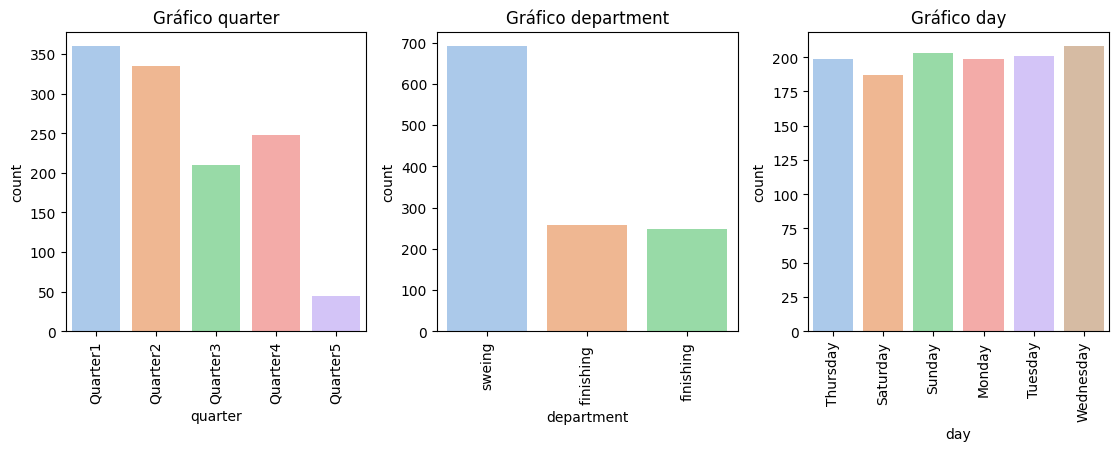

In [11]:
#distribuiçao dados categoricos
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, cat in enumerate(cat_col):
    sns.countplot(data=df, x=cat, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Gráfico {cat}')
    axes[i].tick_params(axis='x', rotation=90)
for j in range(len(cat_col), 12):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

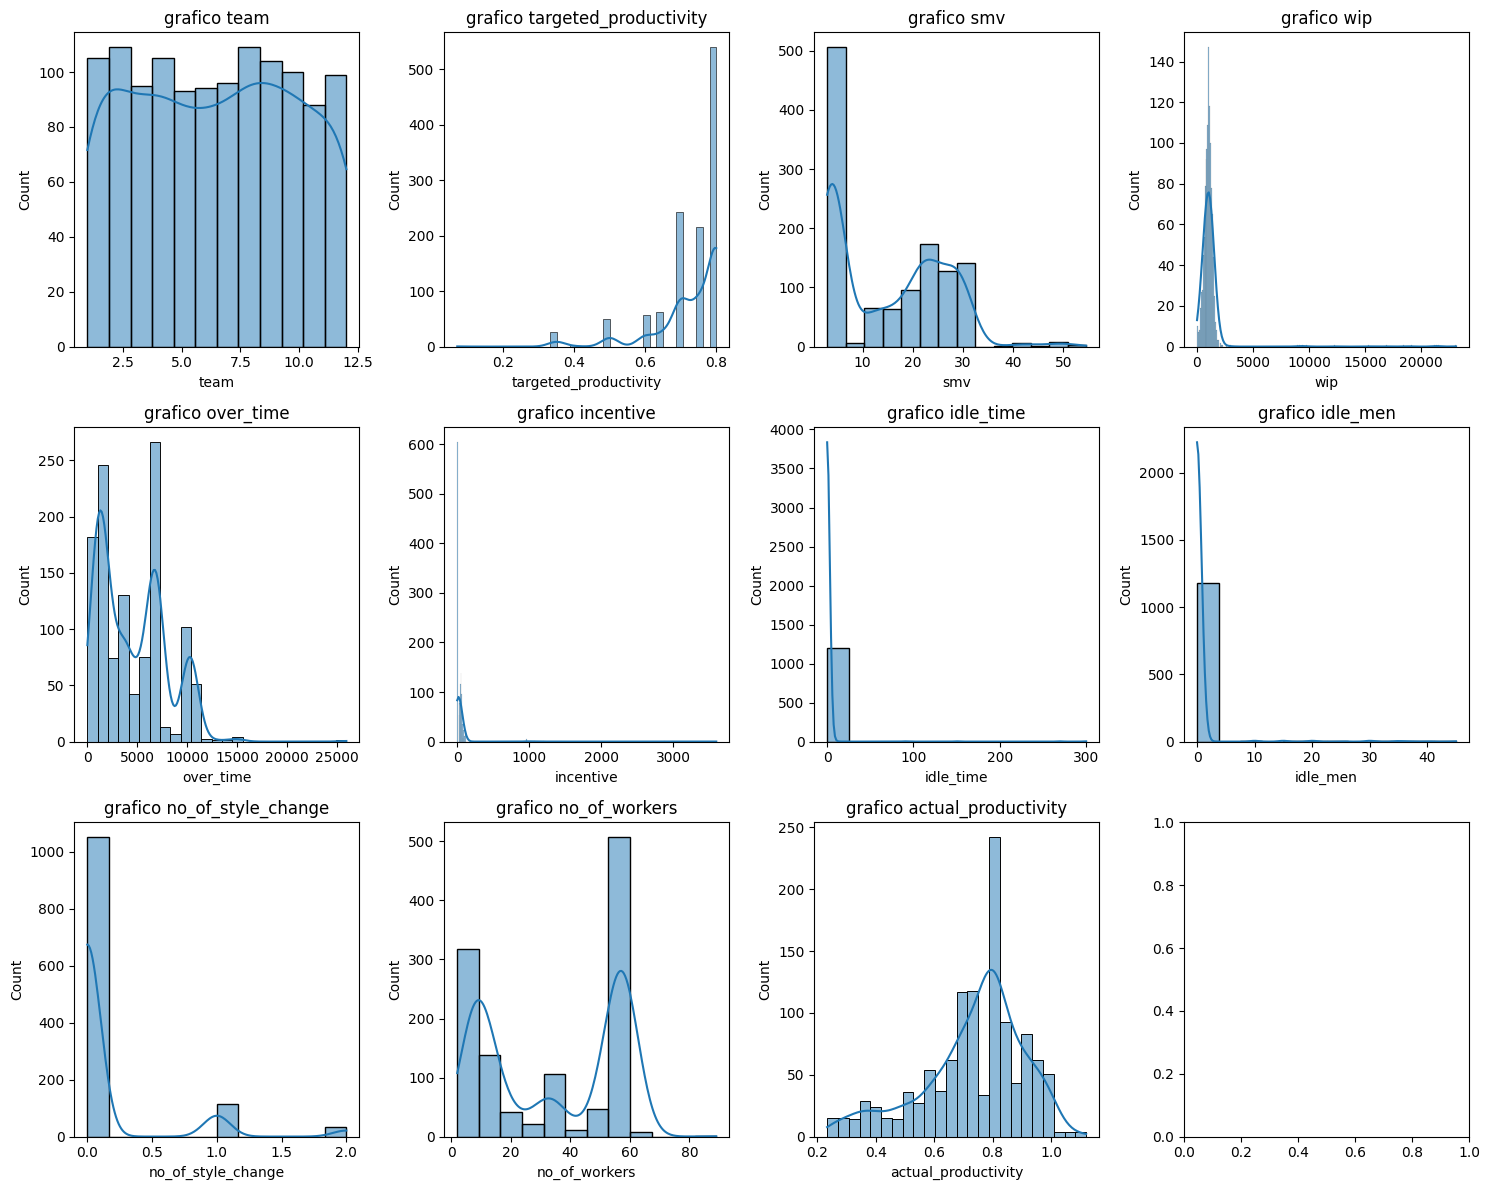

In [12]:
#distribuiçao dados numericos
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.histplot(df[num], kde=True, ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


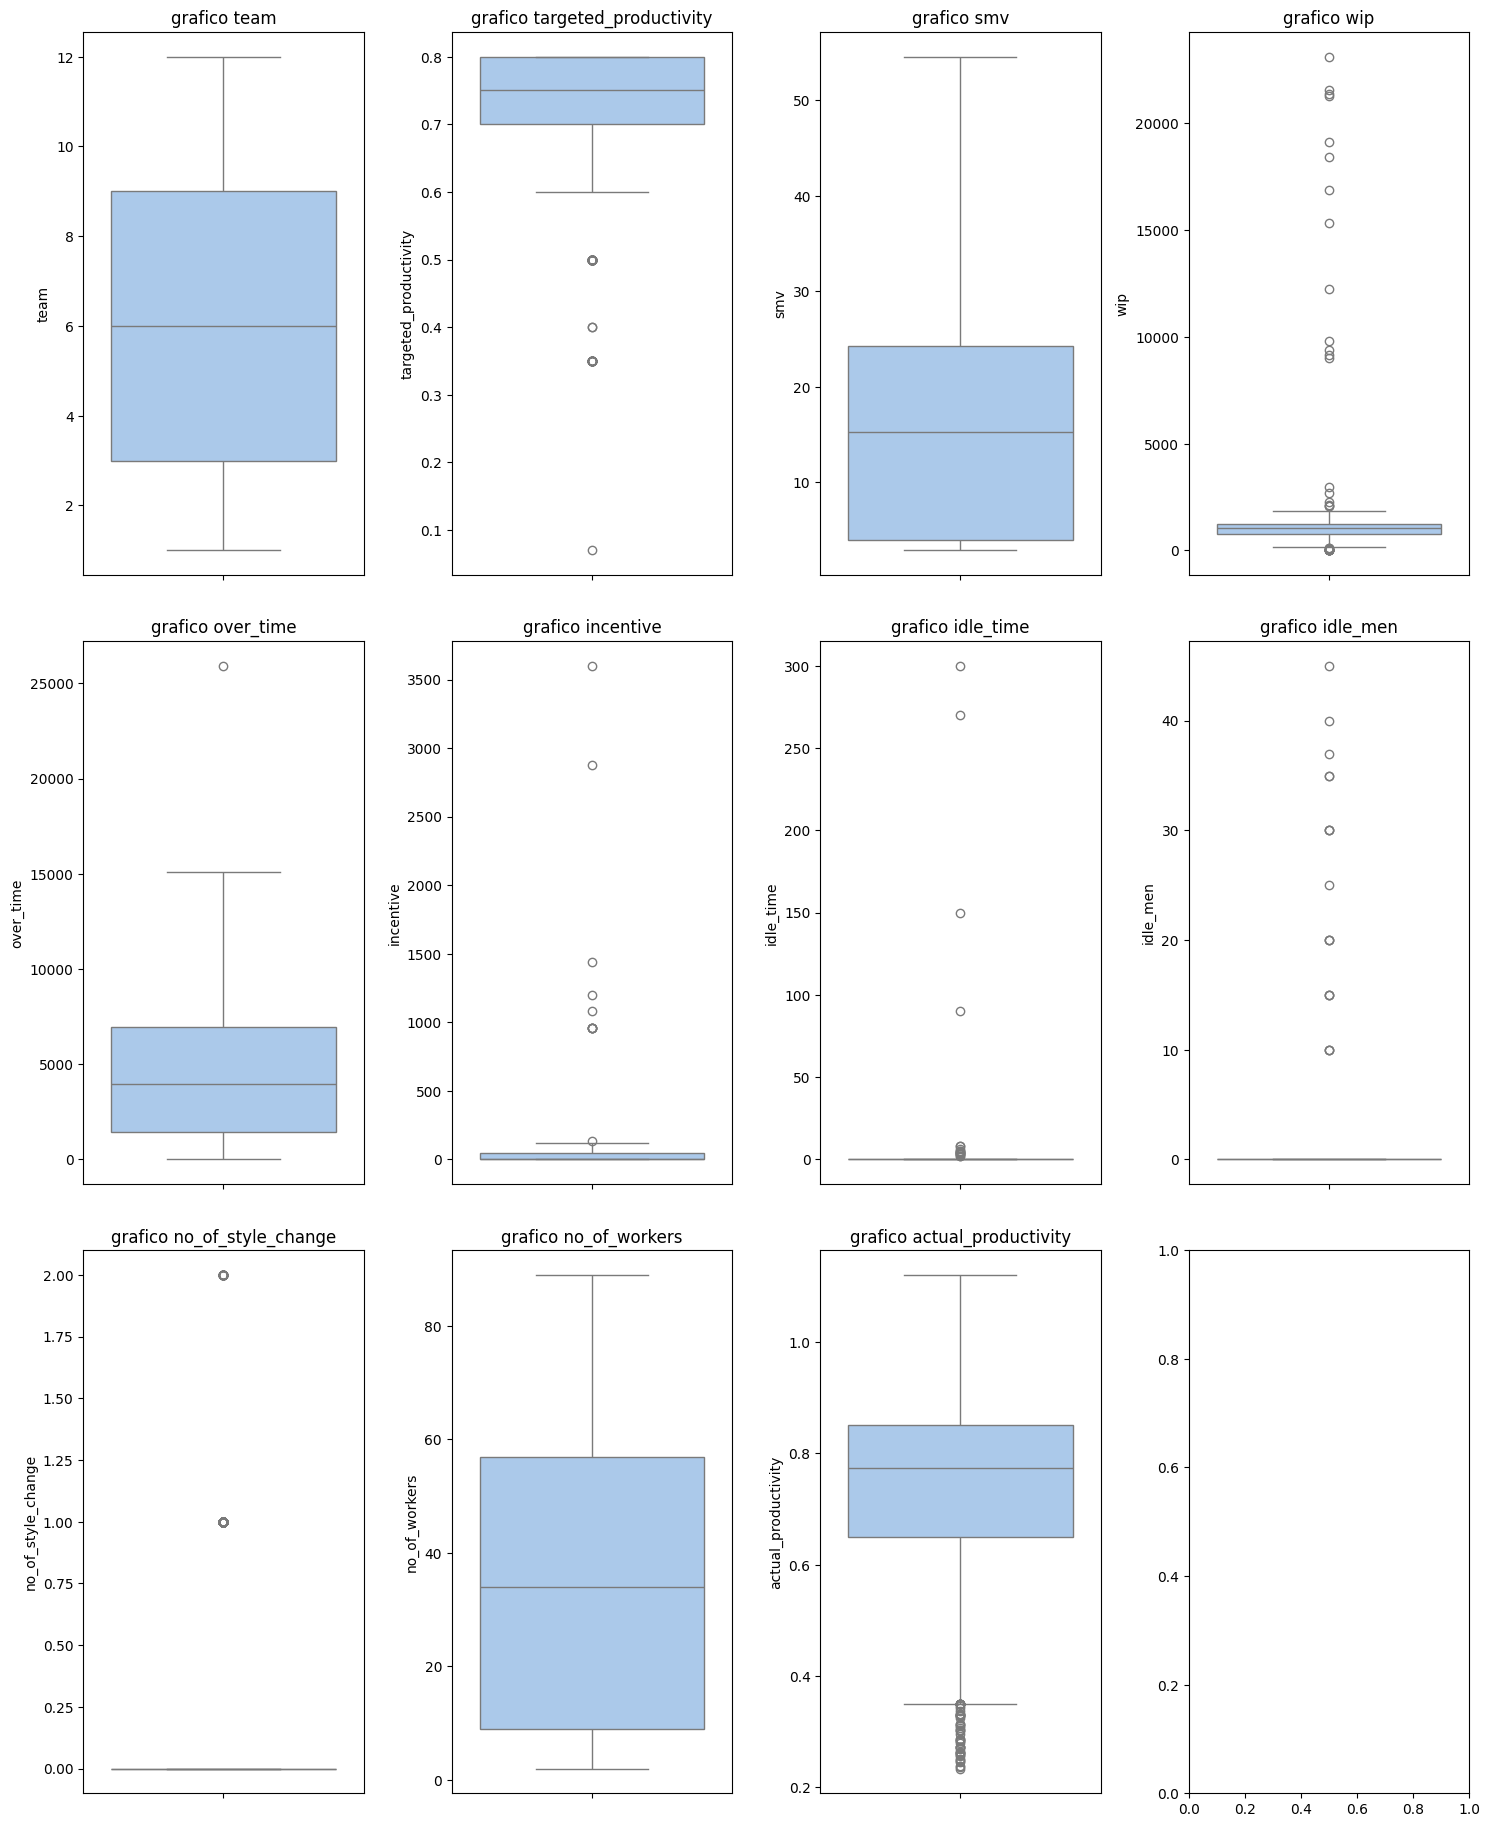

In [13]:
#vizualizaçao em caixa colunas numericas 
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.boxplot(df[num], ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()


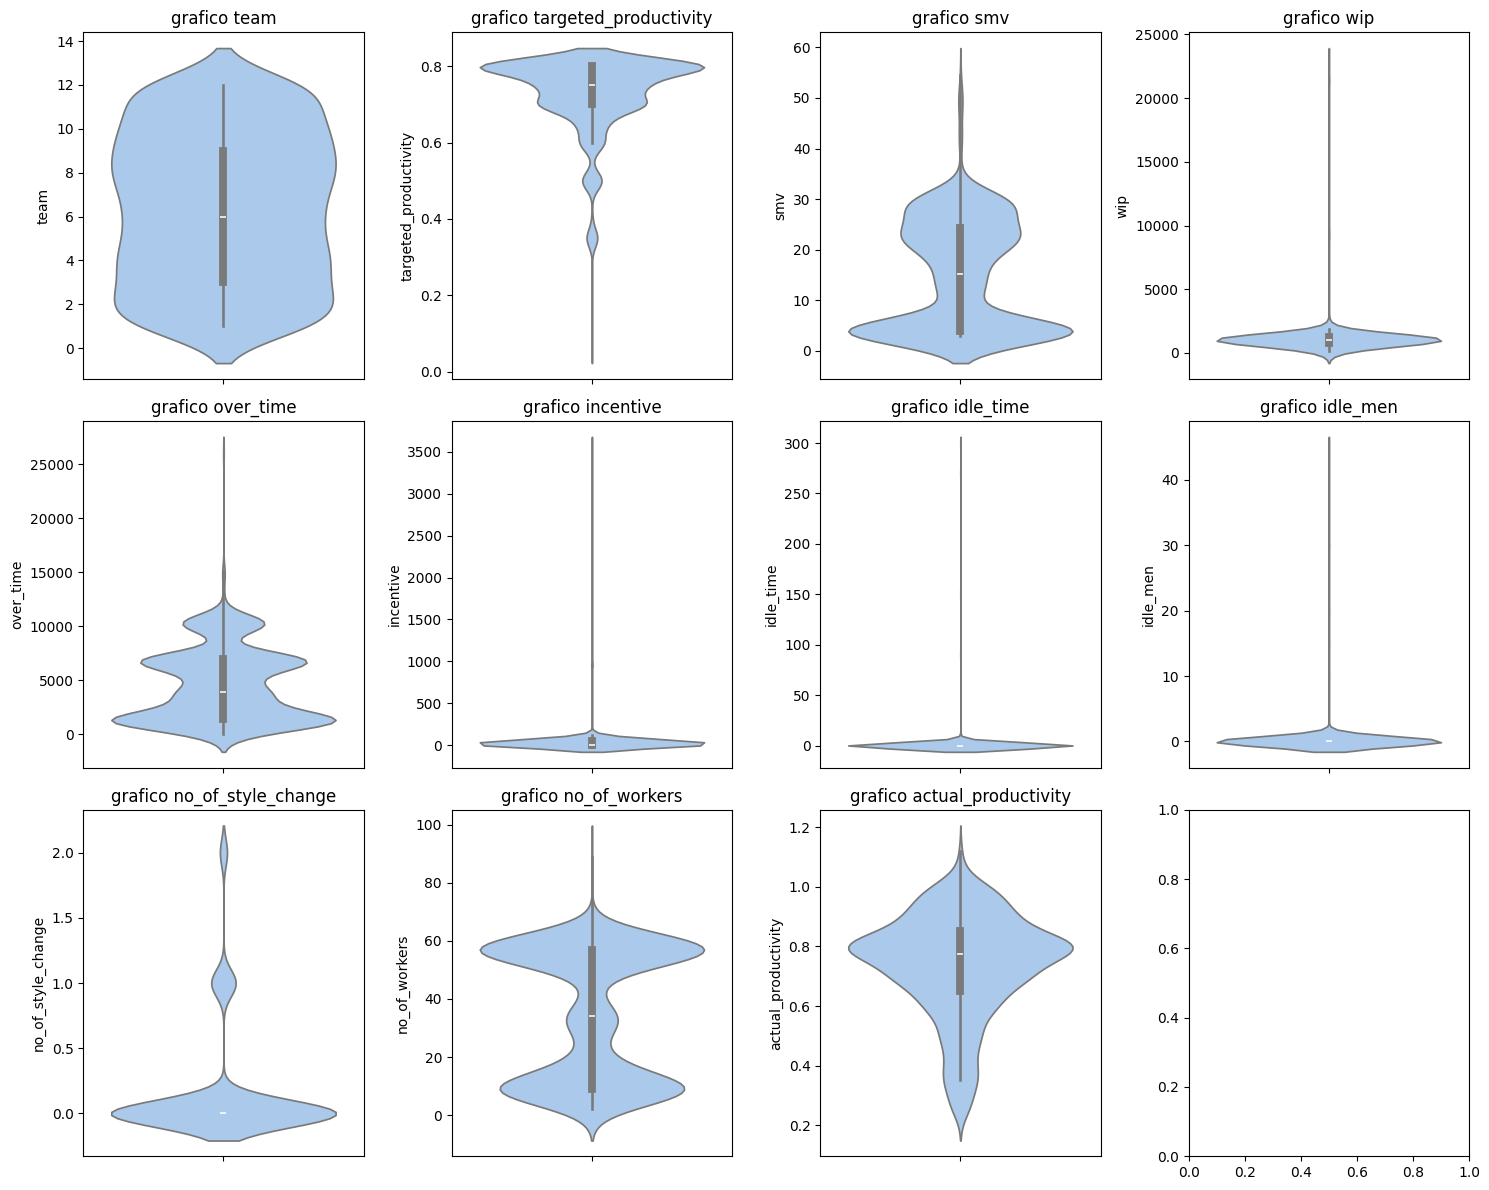

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.violinplot(df[num], ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


Analise Bivariada 

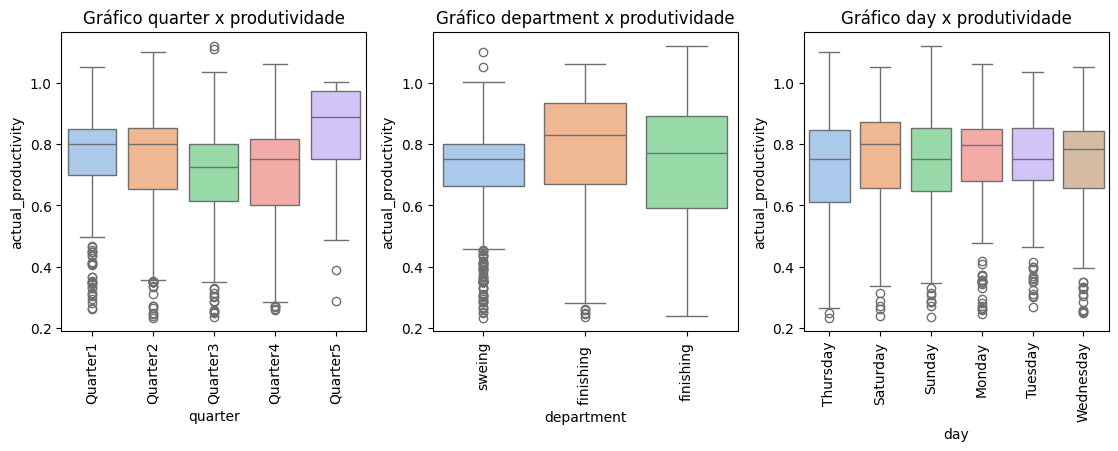

In [15]:
#plot colunas cat x produtividade 
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, cat in enumerate(cat_col):
    sns.boxplot(x=df[cat], y = df['actual_productivity'], ax=axes[i], palette='pastel')
    axes[i].set_title(f'Gráfico {cat} x produtividade')
    axes[i].tick_params(axis='x', rotation=90)
for j in range(len(cat_col), 12):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

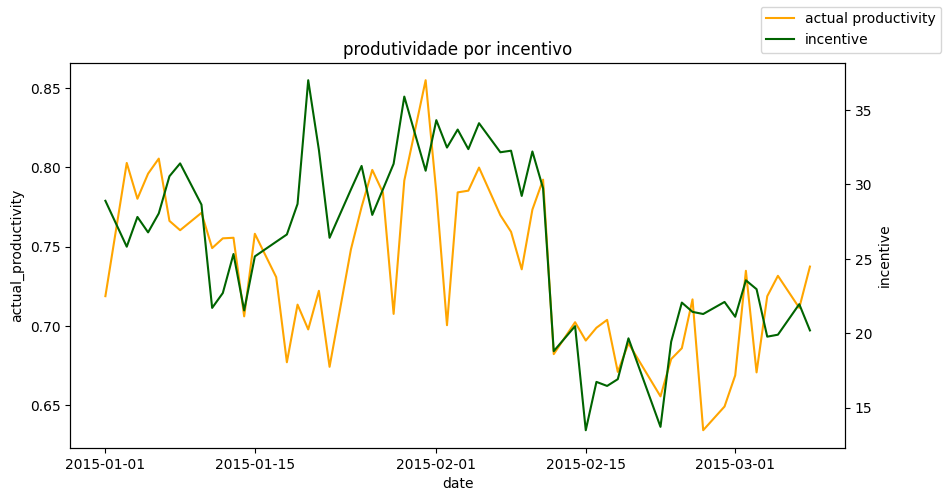

In [17]:
#plot incentive x actual_productivity
df_dt = df[df.date <= pd.to_datetime('2015-03-08')]
plt.figure(figsize=(10,5))
plt.title('produtividade por incentivo')
line1 = sns.lineplot(x='date', y='actual_productivity', data=df_dt, ci= None, color='orange', legend=False, label = 'actual productivity' )
ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=df_dt, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')
line1.figure.legend()

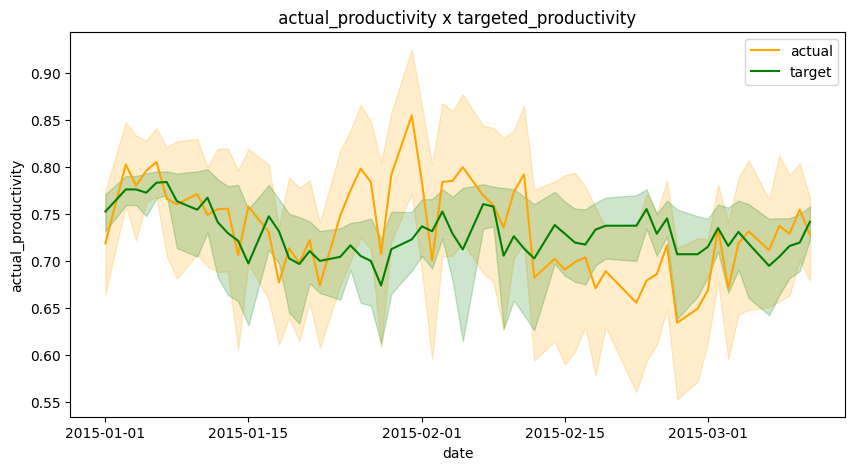

In [18]:
#analise temporal actual_productivity x targeted_productivity 
plt.figure(figsize=(10,5))
plt.title(' actual_productivity x targeted_productivity ')
sns.lineplot(data=df,x='date', y='actual_productivity', color='orange',label='actual')
sns.lineplot(data=df,x='date', y='targeted_productivity', color='green', label='target')
plt.legend()
plt.show()

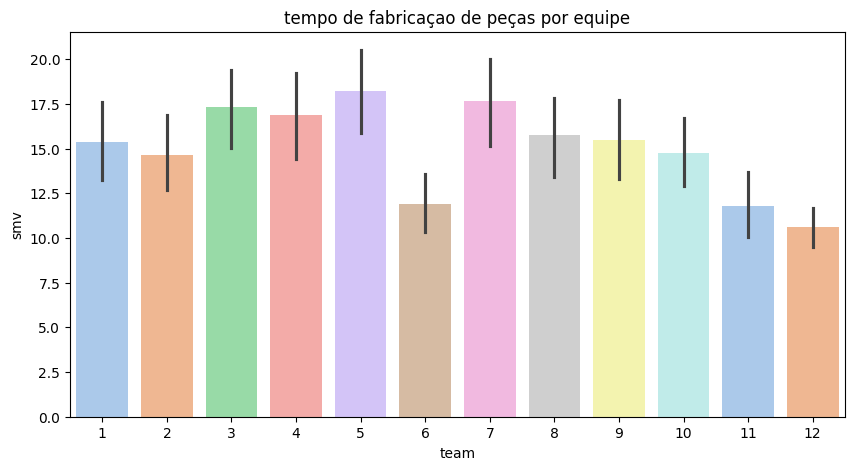

In [19]:
#tempo de fabricaçao de peças por equipes 
plt.figure(figsize=(10,5))
plt.title('tempo de fabricaçao de peças por equipe')
sns.barplot(data=df, x='team', y='smv', palette='pastel')
plt.show()


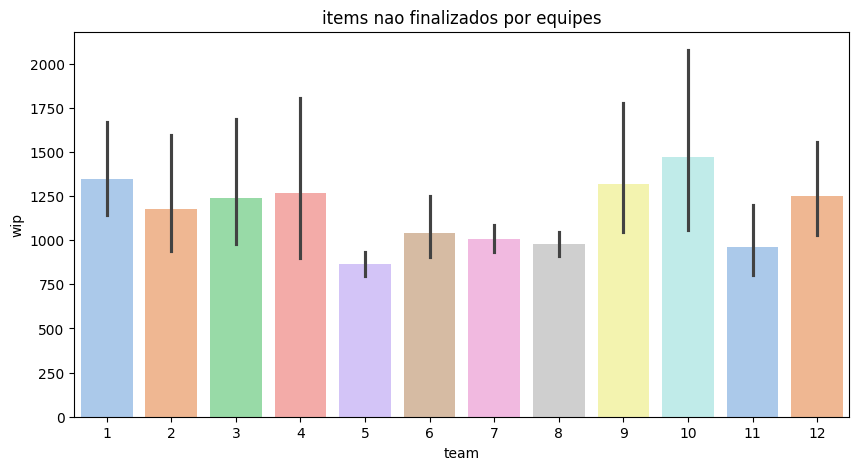

In [20]:
#items nao finalizados por equipes
plt.figure(figsize=(10,5))
plt.title('items nao finalizados por equipes')
sns.barplot(x=df['team'], y= df['wip'], palette='pastel')
plt.show()


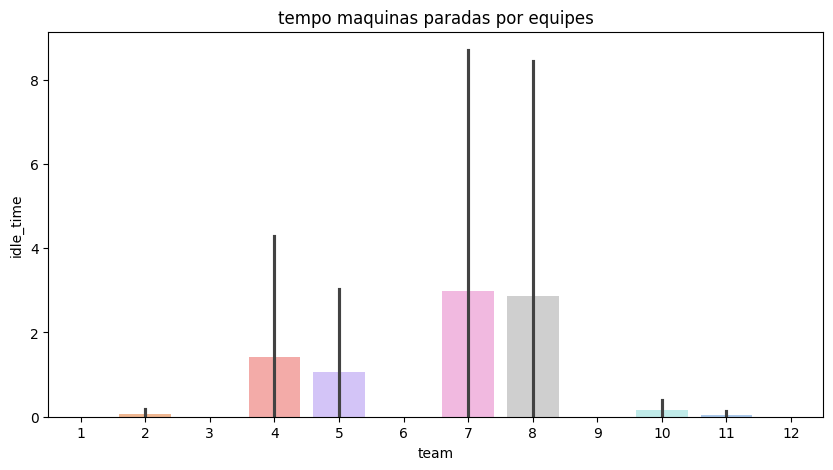

In [21]:
#tempo maquina parada por equipe 
plt.figure(figsize=(10,5))
plt.title('tempo maquinas paradas por equipes')
sns.barplot(x=df['team'], y=df['idle_time'], palette='pastel') 
plt.show()


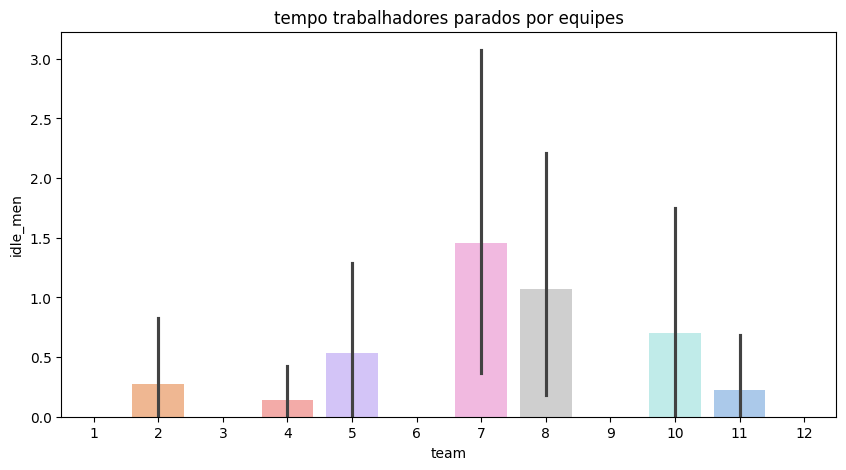

In [22]:
#tempo trabalhadores parados por equipes 
plt.figure(figsize=(10,5))
plt.title('tempo trabalhadores parados por equipes')
sns.barplot(x=df['team'], y=df['idle_men'], palette='pastel')
plt.show()

In [23]:
#aqui selecionei algumas features que podem ter relaçao linear com a produtividade
#por exemplo:relacao temo para produzir uma peça x produtividade 
some_features = ['smv', 'targeted_productivity', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers'
    
]

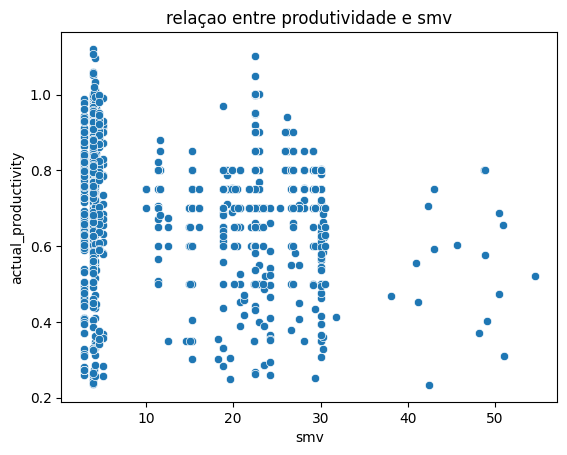

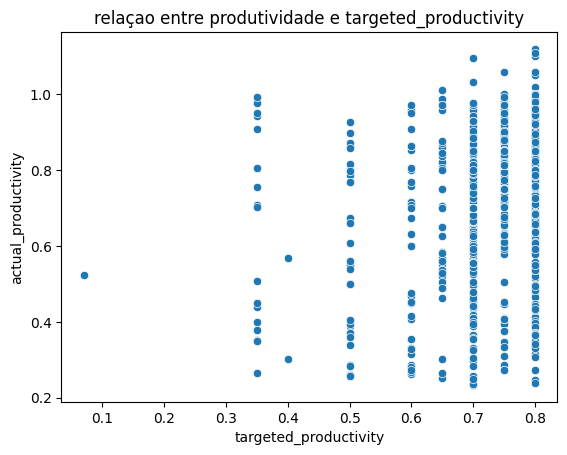

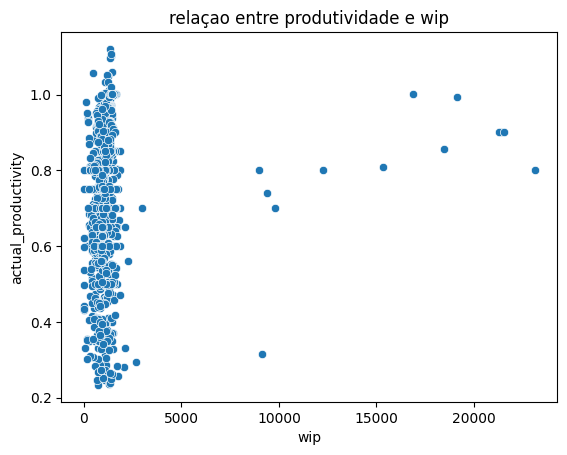

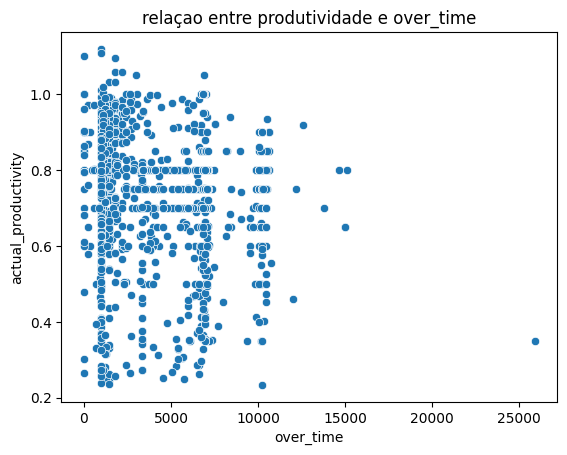

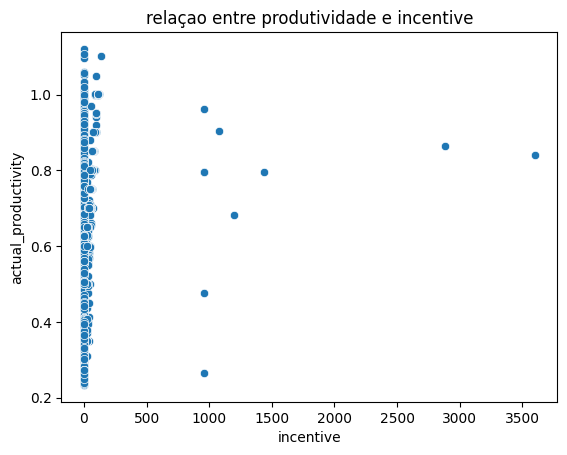

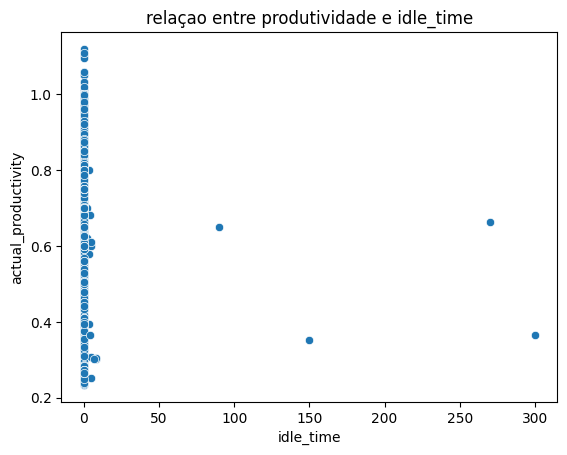

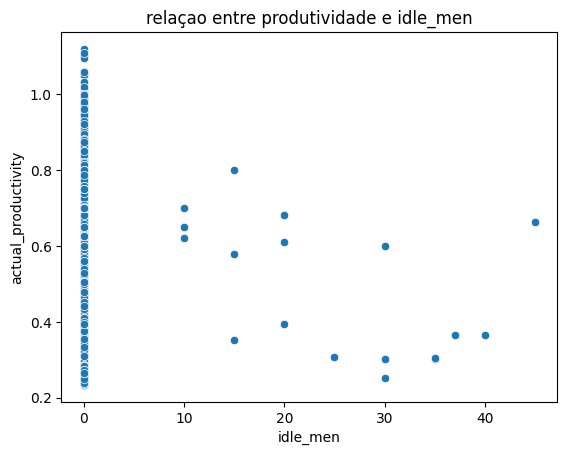

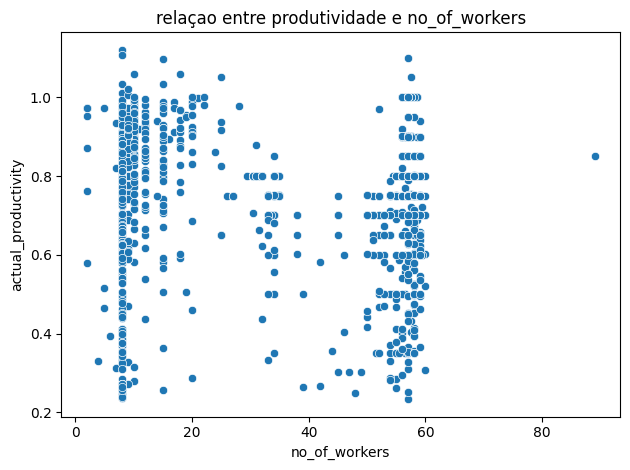

In [24]:
#plotagem das features x produtividade
for i, prod in enumerate(some_features):
    plt.figure()
    plt.title(f'relaçao entre produtividade e {prod}')
    sns.scatterplot(data=df, x=prod, y='actual_productivity', palette='pastel')
plt.tight_layout()
plt.show()

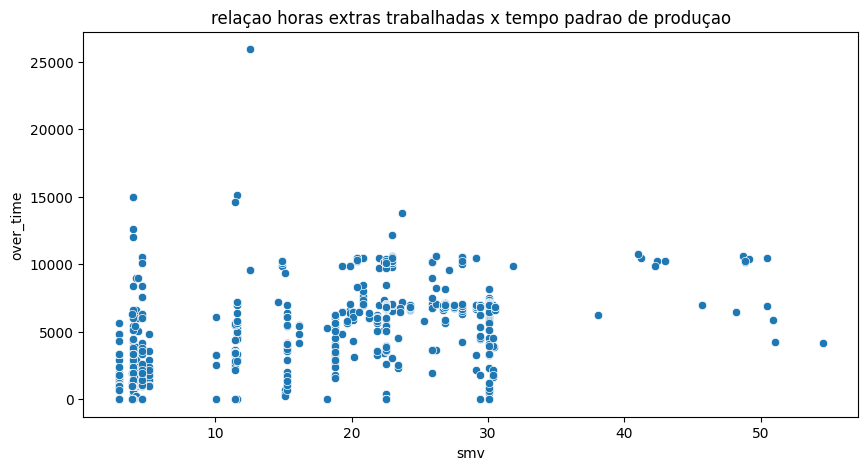

In [25]:
plt.figure(figsize=(10,5))
plt.title('relaçao horas extras trabalhadas x tempo padrao de produçao')
sns.scatterplot(x=df['smv'], y= df['over_time'])
plt.show()

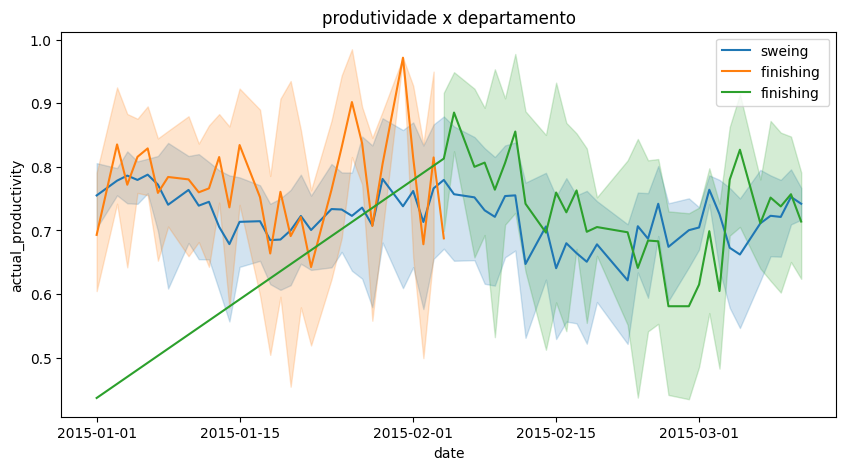

In [26]:
#data x produtividade x departamento
plt.figure(figsize=(10,5))
plt.title('produtividade x departamento')
sns.lineplot(data=df, x='date', y='actual_productivity', hue='department')
plt.legend()
plt.show()


Analise Multivariada 

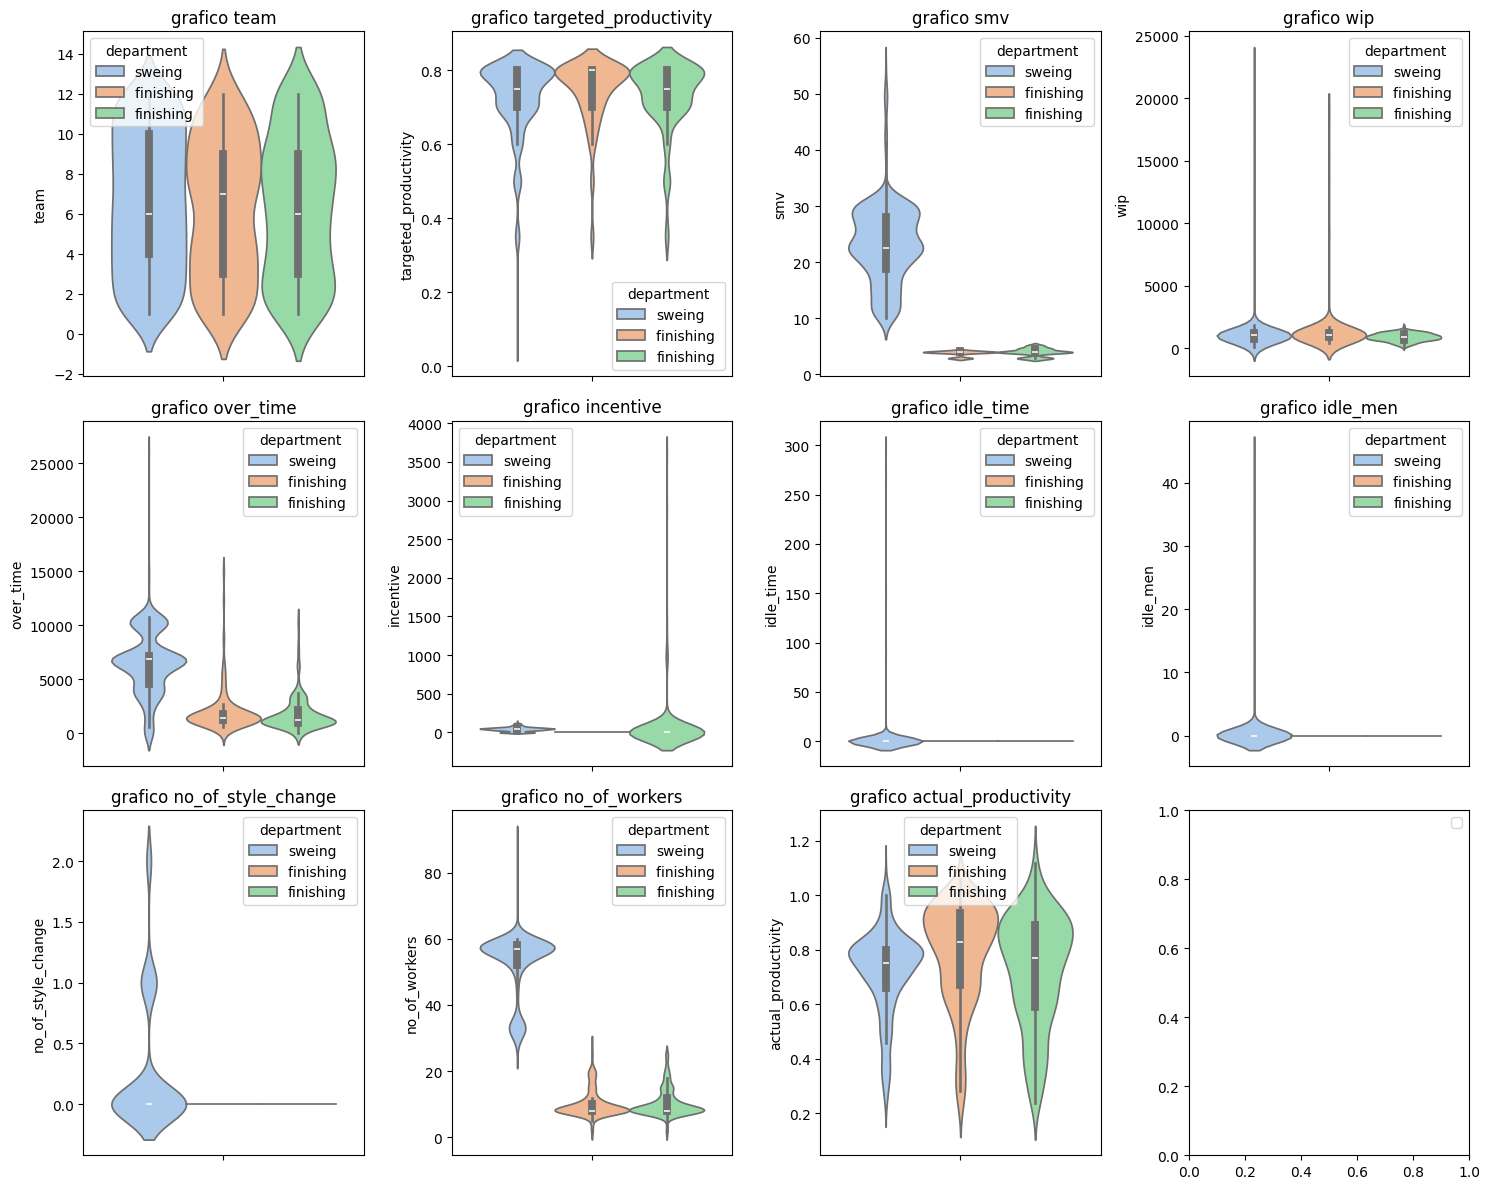

In [27]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.violinplot(y=df[num], ax=axes[i], palette='pastel', hue=df['department'])
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.legend()
plt.show()


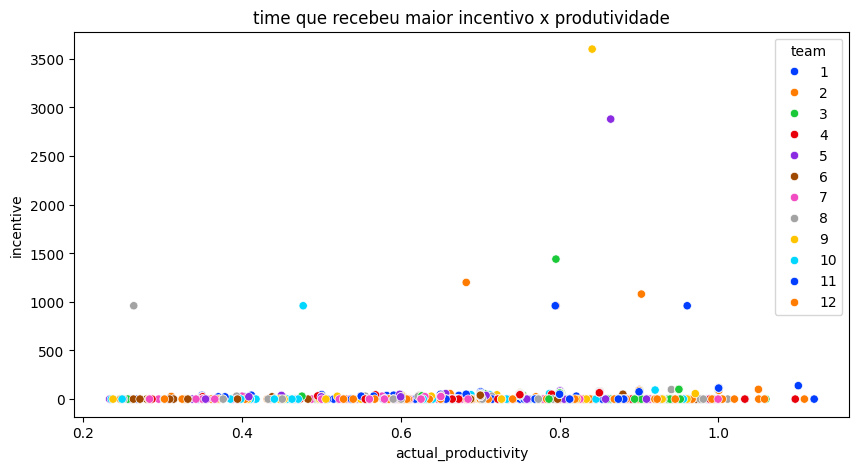

In [28]:
#analise time que recebeu maior incentivo x produtividae
plt.figure(figsize=(10,5))
plt.title('time que recebeu maior incentivo x produtividade')
sns.scatterplot(data=df, x='actual_productivity', y='incentive', hue='team', palette='bright')
plt.show()

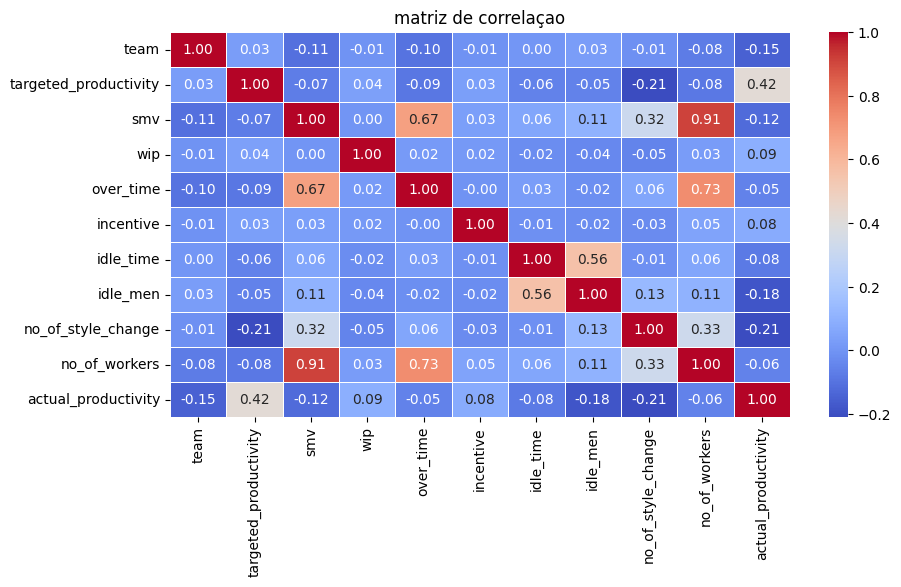

In [29]:
#matriz de correlaçao entre variaveis 
plt.figure(figsize=(10,5))
plt.title('matriz de correlaçao')
sns.heatmap(num_col.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.show()

Criaçao de novas features

In [30]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [31]:
#criaçao de novas features
df['prod_per_worker'] = df['actual_productivity']/df['no_of_workers']
df['diference_prod_targeted_actual'] = df['actual_productivity'] - df['targeted_productivity']
df['time_per_worker'] = df['smv']/ df['no_of_workers']
df['idle_men_percent'] = df['idle_men']/df['no_of_workers']
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,prod_per_worker,diference_prod_targeted_actual,time_per_worker,idle_men_percent
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.015944,0.140725,0.443390,0.0
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1038.0,960,0,0.0,0,0,8.0,0.886500,0.110812,0.136500,0.492500,0.0
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.014293,0.000382,0.462500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,935.0,960,0,0.0,0,0,8.0,0.628333,0.078542,-0.121667,0.362500,0.0
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.074375,0.487500,0.0
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.024375,0.487500,0.0
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,935.0,1800,0,0.0,0,0,15.0,0.505889,0.033726,-0.244111,0.193333,0.0


In [32]:
new_features = ['prod_per_worker','diference_prod_targeted_actual',  'time_per_worker', 'idle_men_percent']

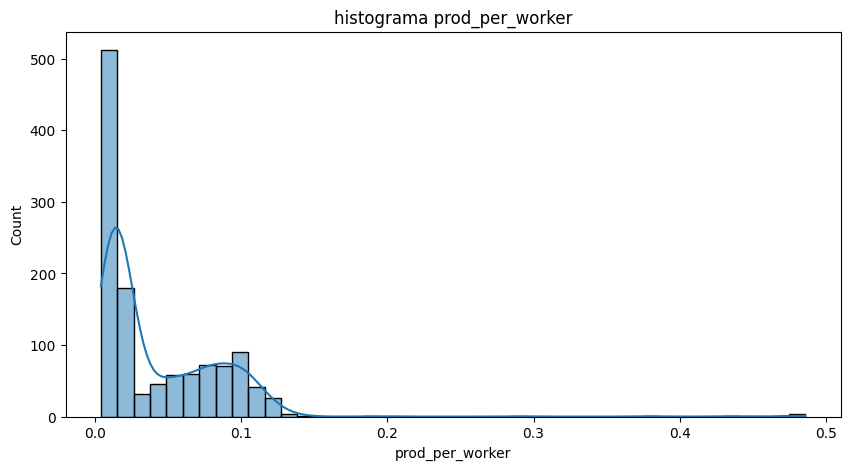

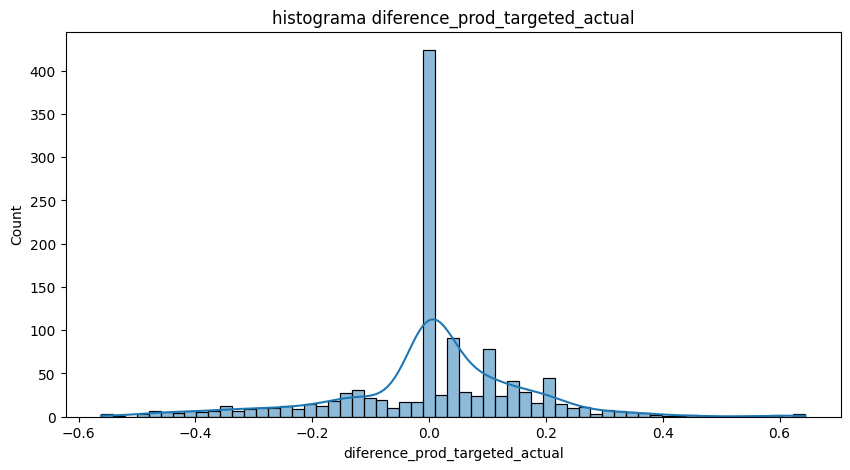

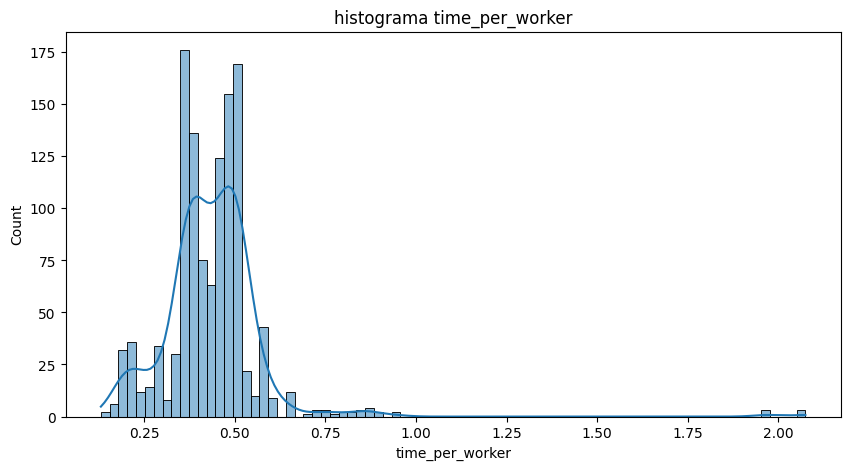

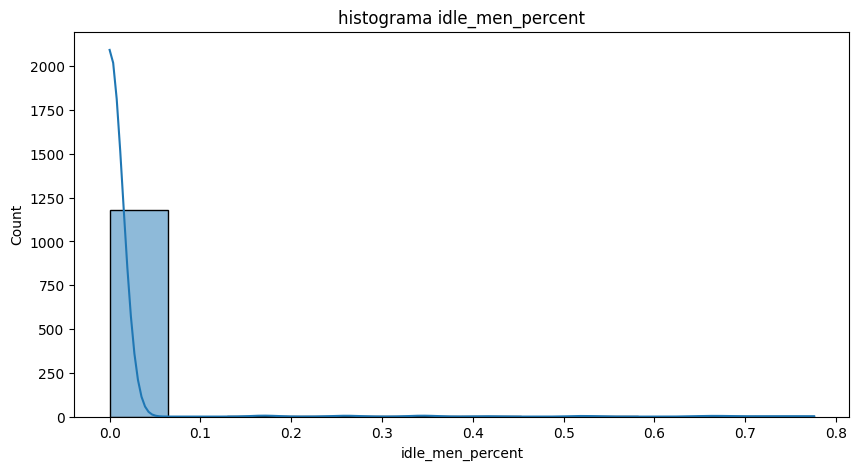

In [33]:
#distribuiçao de novas features
for hist in new_features:
    plt.figure(figsize=(10,5))
    plt.title(f'histograma {hist}')
    sns.histplot(df[hist], kde=True)
plt.show()

In [34]:
new_num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
new_num_col

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,prod_per_worker,diference_prod_targeted_actual,time_per_worker,idle_men_percent
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.015944,0.140725,0.443390,0.0
1,1,0.75,3.94,1038.0,960,0,0.0,0,0,8.0,0.886500,0.110812,0.136500,0.492500,0.0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.014293,0.000382,0.462500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,935.0,960,0,0.0,0,0,8.0,0.628333,0.078542,-0.121667,0.362500,0.0
1193,8,0.70,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.074375,0.487500,0.0
1194,7,0.65,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.024375,0.487500,0.0
1195,9,0.75,2.90,935.0,1800,0,0.0,0,0,15.0,0.505889,0.033726,-0.244111,0.193333,0.0


Matriz correlaçao 

<function matplotlib.pyplot.show(close=None, block=None)>

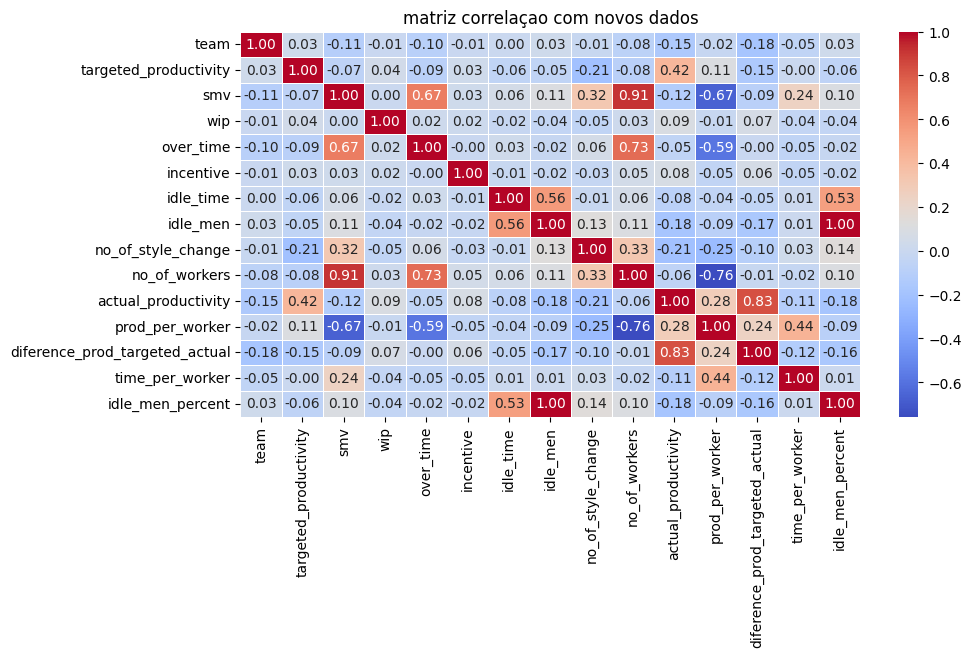

In [35]:
#plotando nova matriz de correlaçao
plt.figure(figsize=(10,5))
plt.title('matriz correlaçao com novos dados')
sns.heatmap(new_num_col.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.show

Modelagem 

In [36]:
#colocando data como index 
df = df.set_index(df['date'])
df = df.drop('date', axis=1)

In [37]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'prod_per_worker', 'diference_prod_targeted_actual', 'time_per_worker',
       'idle_men_percent'],
      dtype='object')

In [38]:
#escolhendo x e y 
x = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

In [39]:
x.shape, y.shape

((1197, 17), (1197,))

In [40]:
#split
split_size = 0.9
train_size = int(len(df) * split_size)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [41]:
x_train.shape, x_test.shape

((1077, 17), (120, 17))

In [42]:
y_train.shape, y_test.shape

((1077,), (120,))

In [43]:
new_num_col.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'prod_per_worker',
       'diference_prod_targeted_actual', 'time_per_worker',
       'idle_men_percent'],
      dtype='object')

In [44]:
cat_col

Index(['quarter', 'department', 'day'], dtype='object')

In [45]:
#separaçao de atributos 
num_atribs = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'prod_per_worker',
       'diference_prod_targeted_actual', 'time_per_worker',
       'idle_men_percent']
        
cat_atribs = ['quarter', 'department', 'day']

In [46]:
#pipeline numerica
num_pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
])

In [47]:
#transformaçao de colunas 
column_tranf = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_atribs),  
    ('1hot_enc', OneHotEncoder(), cat_atribs)   
])

In [48]:
#definiçao da pipe
pipe = Pipeline([('transform', column_tranf),
                ('model', Lasso())
    
])

In [49]:
#teste da pipe
pipe.set_params(model=Ridge()).fit(x_train, y_train)
pipe_pred = pipe.predict(x_test)


In [50]:
#funçao para calcular metricas 
def metrics(model_name, y_test, y_pred):
    result_list = []
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 
    mean_percent = mean_absolute_percentage_error(y_test, y_pred)
    
    results = {'model_name':model_name,
        'mse':mse,
        'mae':mae,
        'r2':r2,
        'mean_percent':mean_percent,
        
    }
    result_list.append({'model_name':results['model_name'],
                    'mse':results['mse'],
                    'mae':results['mae'],
                    'r2':results['r2'],
                    'mean_percent':results['mean_percent']})
    return pd.DataFrame(result_list)

In [51]:
 metrics(model_name=Ridge(), y_test=y_test, y_pred=pipe_pred)

,model_name,mse,mae,r2,mean_percent
0,Ridge(),0.000016,0.001102,0.999314,0.001621


Treinamento e avaliaçao dos modelos 

In [52]:
models =  {'Reg_linear':LinearRegression(),
        'D_tree':DecisionTreeRegressor(),
        'Ada_reg': AdaBoostRegressor(),
        'Neural_net':MLPRegressor(),
        'Reg_lasso':Lasso(),
        'Ridge':Ridge(),
        'SVR': SVR()
    
}

In [53]:
#loop treino/teste
for i, (model_name, model) in enumerate(models.items()):
    pipe.set_params(model=model).fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    metrics_out = metrics(model_name=model_name, y_pred=y_pred, y_test=y_test)
    
    print('--------------------'*10)
    print(metrics_out)
    

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   model_name           mse           mae   r2  mean_percent
0  Reg_linear  3.614842e-31  3.261280e-16  1.0  5.249231e-16
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  model_name       mse      mae        r2  mean_percent
0     D_tree  0.001299  0.01475  0.942985      0.025671
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  model_name       mse       mae        r2  mean_percent
0    Ada_reg  0.001497  0.029836  0.934279      0.047297
-------------------------------------------------

Cross val score

In [54]:
for i, (val_name, val_score) in enumerate(models.items()):
    estimator = pipe.set_params(model=val_score).fit(x_train, y_train)
    cross_val = cross_val_score(estimator, x_train, y_train, cv=10, scoring='r2')
    val_results = {
                'score':cross_val, 
        'score_max':cross_val.max(),
                'score_min':cross_val.min(),
                'score_media':cross_val.mean()
    }
    print(val_name)
    print(val_results)
    print('--------------------'*10)


Reg_linear
{'score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'score_max': 1.0, 'score_min': 1.0, 'score_media': 1.0}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
D_tree
{'score': array([0.99099185, 0.97781675, 0.95495227, 0.923358  , 0.95234537,
       0.98690596, 0.9620003 , 0.98651117, 0.9866609 , 0.9675875 ]), 'score_max': 0.990991851319706, 'score_min': 0.923357997228571, 'score_media': 0.9689130058025934}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ada_reg
{'score': array([0.73130863, 0.86192176, 0.90722499, 0.93735509, 0.93581525,
       0.91559041, 0.91582407, 0.93094574, 0.93307069, 0.90199688]), 'score_max': 0.9373550911732711, 'score_min': 0.7313086269667762, 

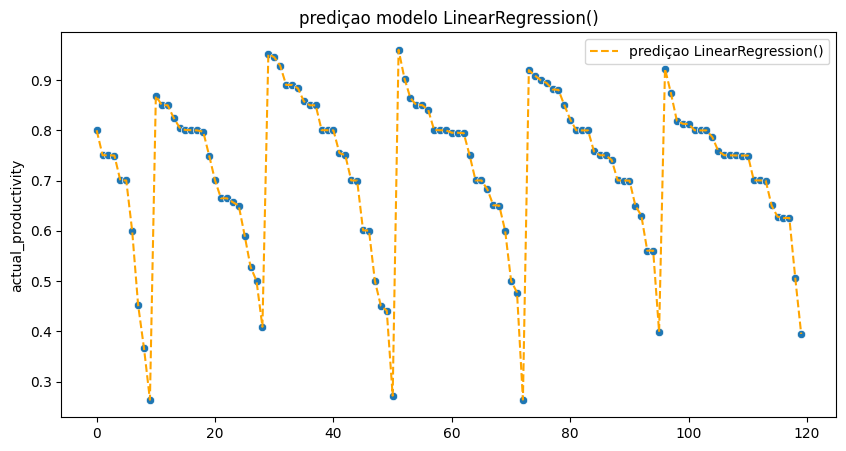

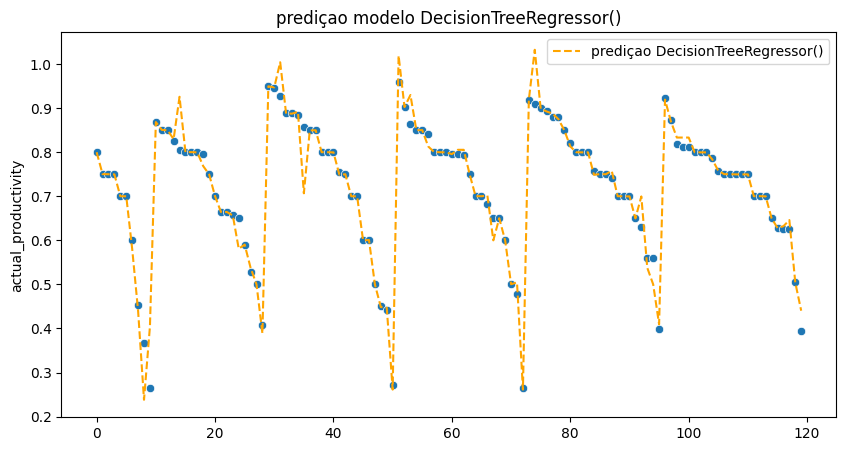

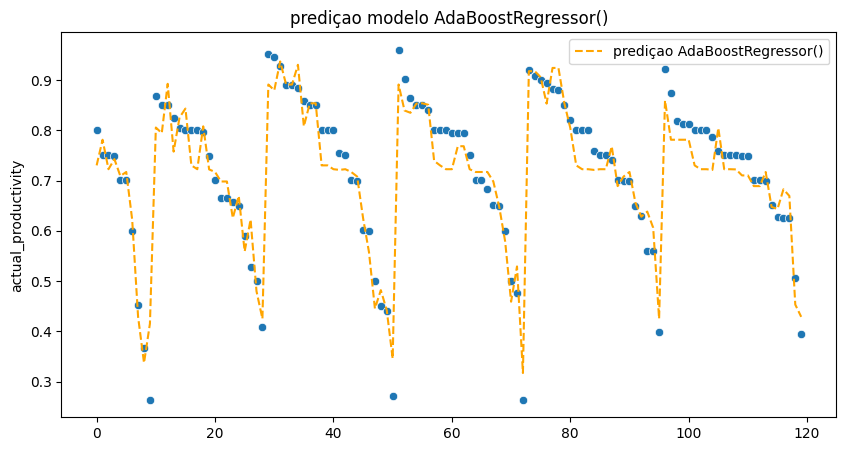

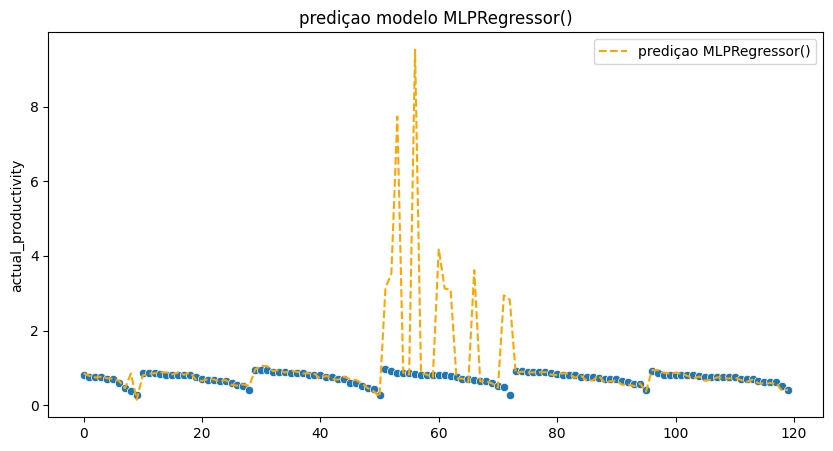

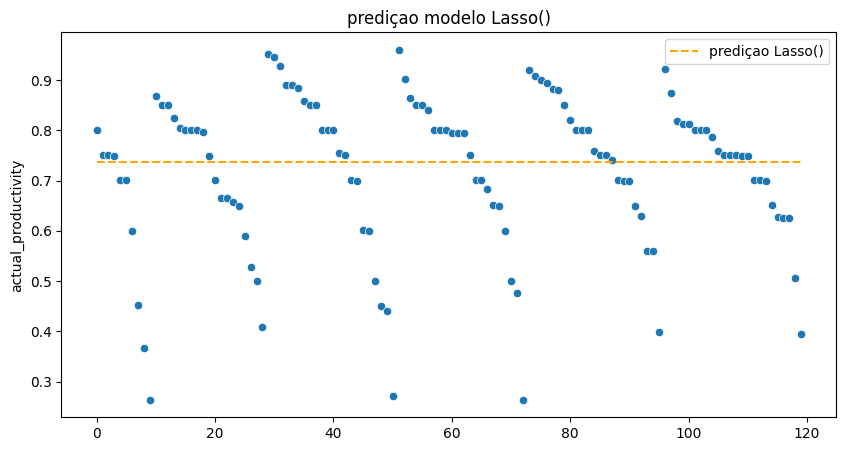

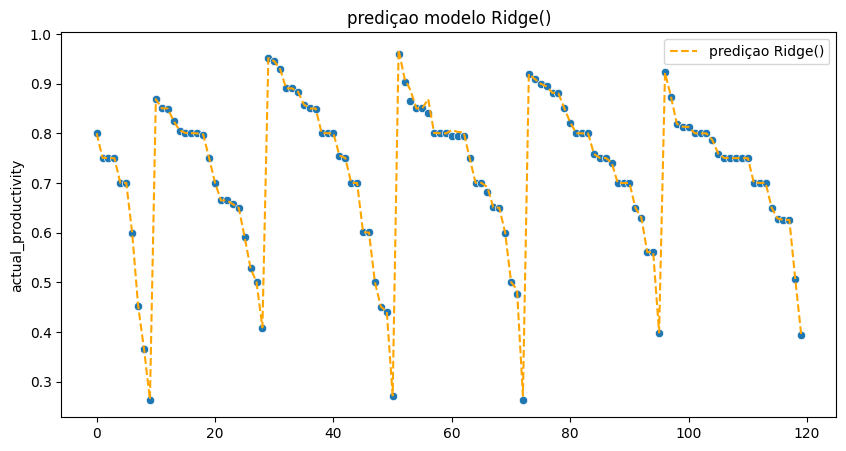

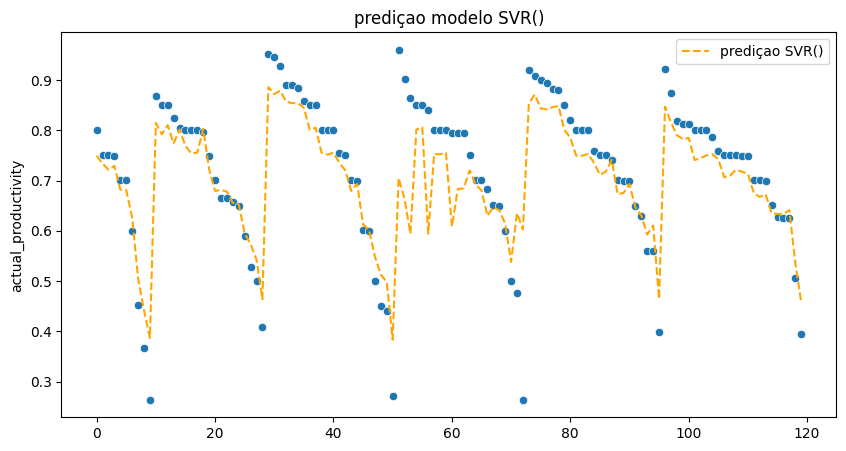

In [55]:
#plotando y e linhas de prediçao 
for i, testes in models.items():
    pipe.set_params(model=testes).fit(x_train, y_train)
    _pred = pipe.predict(x_test)
    plt.figure(figsize=(10,5))
    plt.title(f'prediçao modelo {testes}')
    sns.scatterplot(x=range(len(y_test)), y=y_test)
    sns.lineplot(_pred, color='orange', label=f'prediçao {testes}', linestyle='--')  

Relatório dos Modelos

**Regressão Linear**

Métricas:

MSE: 3.614842e-31

MAE: 3.261280e-16

R²: 1.0

Mean Percent: 5.249231e-16

-> Apresenta scores extremamente altos pela baixa complexidade do modelo em relação aos dados, podendo indicar overfitting.

**Árvores de Decisão**

Métricas:

MSE: 0.001089

MAE: 0.014322

R²: 0.952174

Mean Percent: 0.024498

-> Boas métricas, com erro baixo e bom desempenho em relação à variabilidade dos dados.

Pode ser uma boa escolha para aplicação futura.

**AdaBoosting**

Métricas:

MSE: 0.001937

MAE: 0.035939

R²: 0.914977

Mean Percent: 0.056122

-> Assim como a árvore de decisão, o AdaBoost apresenta bom desempenho e trabalha bem com a variabilidade dos dados.

Pode ser considerado para futuro deploy, levando em conta o custo operacional.

**Rede Neural**

Métricas:

MSE: 0.168849

MAE: 0.140431

R²: -6.413276

Mean Percent: 0.207295

-> Desempenho ruim, com erros altos e baixo score em R².

Dos modelos treinados, é um dos piores.

O desempenho pode melhorar significativamente se ajustarmos os hiperparâmetros.

**Regressão Lasso**

Métricas:

MSE: 0.022963

MAE: 0.114869

R²: -0.008171

Mean Percent: 0.207104

-> Desempenho ruim, com R² próximo de 0.

Não deve ser levado em consideração neste experimento.

**Regressão Ridge**

Métricas:

MSE: 0.000016

MAE: 0.001102

R²: 0.999314

Mean Percent: 0.001621

-> Vencedor do experimento.

Beira a perfeição, explicando muito bem a variabilidade dos dados (R² alto) e apresentando erros muito baixos.

Modelo recomendado para produção.

**SVR (Suporte a Vetores)**

Métricas:

MSE: 0.005414

MAE: 0.049011

R²: 0.762313

Mean Percent: 0.079265

-> Desempenho intermediário.

R² abaixo do esperado, o que limita sua aplicabilidade.

**Multicolinaridade**

Nossos dados indicam a presença de multicolinearidade, ou seja, duas ou mais variáveis independentes apresentam uma correlação muito alta. Isso pode prejudicar o desempenho do nosso modelo de regressão, reduzindo sua capacidade de generalização e tornando as estimativas dos coeficientes menos confiáveis. Para melhorar a robustez do modelo, é importante identificar e tratar a multicolinearidade adequadamente.

**PCA**

O PCA transforma os dados originais em um novo conjunto de variáveis não correlacionadas, chamadas componentes principais. Isso ajuda a resolver a multicolinearidade, pois as novas variáveis são ortogonais entre si. Sendo ortogonais, essas variáveis não possuem correlação entre si.

In [56]:
#pipe pca
pipe_pca = Pipeline([('transform', column_tranf),
                ('pca', PCA()),
                ('model', Lasso())
            
    
])

In [57]:
pipe_pca.set_params(model=Ridge()).fit(x_train, y_train)
pca_pred = pipe_pca.predict(x_test)
metrics(model_name=Lasso(), y_pred=pca_pred, y_test=y_test)

,model_name,mse,mae,r2,mean_percent
0,Lasso(),0.000016,0.001102,0.999314,0.001621


In [58]:
#loop treinp/teste utilizando pca 
print('treino/avaliaçao pós PCA')
for i, (pca_name, model_pca) in enumerate(models.items()):
    pipe.set_params(model=model_pca).fit(x_train, y_train)
    pca_pred = pipe.predict(x_test)
    pca_out = metrics(model_name=pca_name, y_pred=pca_pred, y_test=y_test)
    print('-------------------------------'*10)
    print(pca_out)

treino/avaliaçao pós PCA
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   model_name           mse           mae   r2  mean_percent
0  Reg_linear  3.614842e-31  3.261280e-16  1.0  5.249231e-16
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  model_name      mse       mae        r2  mean_percent
0     D_tree  0.00099  0.013058  0.956548       0.02189
-----------------------------------------------------------------------------------------------------------------------

No geral, usamos o PCA para tratar a multicolinearidade de nossos modelos. No entanto, observamos uma melhora nos modelos baseados em árvore de decisão.

A regressão Ridge manteve seu desempenho ótimo.

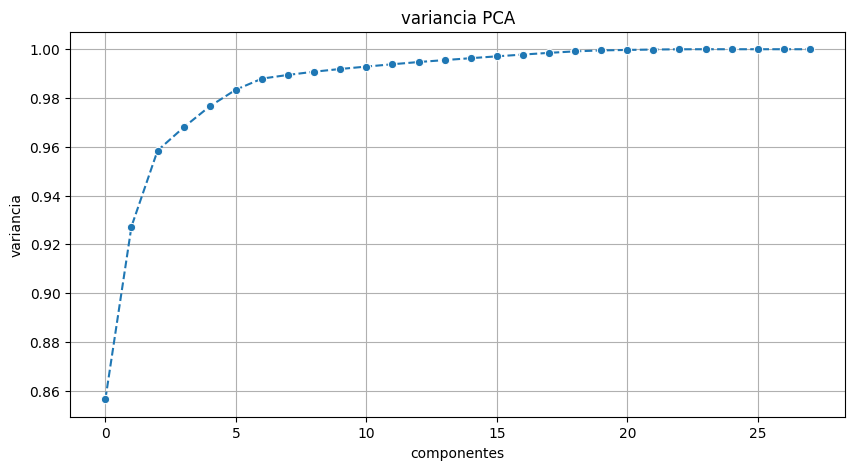

In [59]:
#vizualizando variancia 
pca = pipe_pca.named_steps['pca']
plt.figure(figsize=(10,5))
plt.title('variancia PCA')
sns.lineplot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('componentes')
plt.ylabel('variancia')
plt.grid()
plt.show()



Redes neurais - Pytorch 

Nessa parte do projeto eu escolhi trabalhar um pouco com o Pytorch, afim de trabalhar com redes profundas.
Por tratar de dados temporais, vamos utilizar modelos baseados em recorrencia: LSTM e CNN 

Redes recorrentes utilizam a lógica de loop, ou seja, a informação retorna ao processamento, permitindo que os dados persistam.

**Long Short Term Memory (LSTM)**

As LSTM são redes recorrentes que "lembram" informações de forma mais eficiente, resolvendo problemas como o desaparecimento e explosão do gradiente. Elas possuem células com três portas principais: a porta de entrada, que controla as novas informações a serem armazenadas; a porta de esquecimento, que decide o que deve ser descartado; e a porta de saída, que define as informações usadas na saída. Essa estrutura permite que as LSTM capturem dependências de longo prazo em dados sequenciais, sendo eficazes em tarefas como tradução automática e reconhecimento de fala.



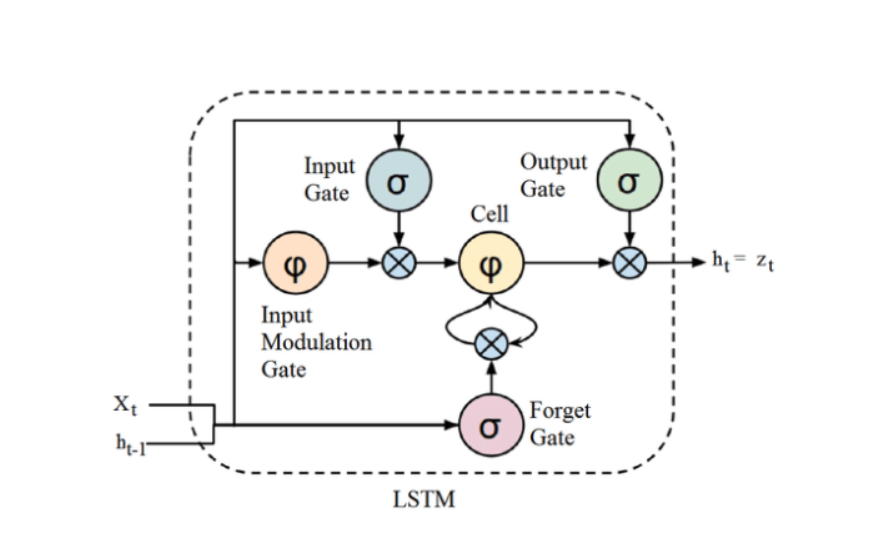

In [66]:
x_train.shape

(1077, 17)

In [ ]:
#criaçao da classe da LSTM
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.LSTM1 = nn.LSTM(input_size=28, hidden_size=300)
        self.LSTM2 = nn.LSTM(300, 150)
        self.LSTM3 = nn.LSTM(150, 50)
        self.LSTM4 = nn.LSTM(50, 50, dropout=0.3, num_layers=2)
        self.dropout = nn.Dropout(p=0.3)
        self.linear = nn.Linear(50, 1)  
        
    def forward(self, x):
        x, (h1, c1) = self.LSTM1(x)
        x, (h2, c2) = self.LSTM2(x)
        x, (h3, c3) = self.LSTM3(x)
        x, (h4, c4) = self.LSTM4(x)
        x = self.dropout(x)
        x = x[:, -1, :]  
        x = self.linear(x)
        
        return x

        


In [142]:
#escolhendo criterio para o erro e optimizador 
model_lstm = LSTM()
criterion = nn.MSELoss()
optmizer = optim.SGD(model_lstm.parameters())

In [143]:
#tranformaçao dos dados 
pipe_transf = Pipeline(steps=[
    ('transf', column_tranf)
])
x_train_torch = pipe_transf.fit_transform(x_train)

In [144]:
#transformaçao dados em np.array
x_array = np.array(x_train_torch)
y_array = np.array(y_train)
type(y_array), type(x_array)

(numpy.ndarray, numpy.ndarray)

In [145]:
#transformaçao dados em tensores 
x_train_tensor = torch.Tensor(x_array)
y_train_tensor = torch.Tensor(y_array)
x_train_tensor = x_train_tensor.unsqueeze(1) 
y_train_tensor = y_train_tensor.long()


In [146]:
print(x_train_tensor.shape)  # Verifique a forma


torch.Size([1077, 1, 28])


estatisticas do treinamento - LSTM
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
epoca 0 erro: 0.033732619136571884
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
epoca 1 erro: 0.03370904549956322
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

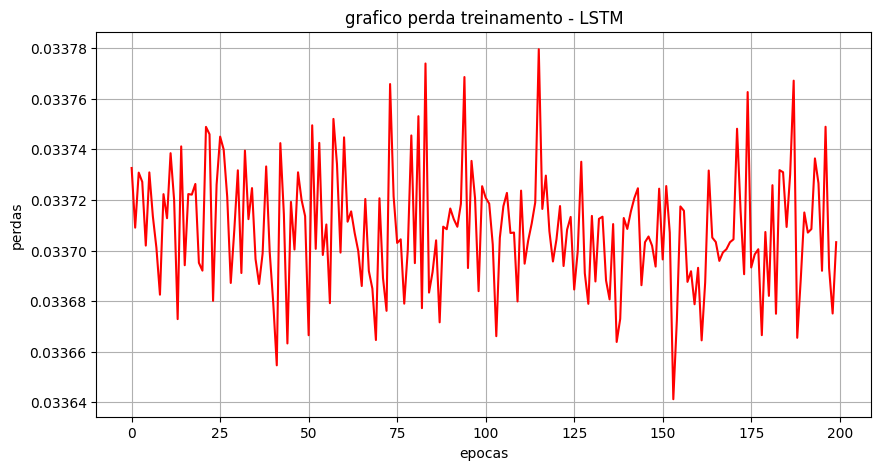

In [161]:
#loop treinamento 
print('estatisticas do treinamento - LSTM')
losses = []
for epoch in range(200):
    model_lstm.train()
    lstm_pred = model_lstm(x_train_tensor)
    lstm_pred = lstm_pred.float()
    y_train_tensor = y_train_tensor.float()
    loss = criterion(lstm_pred, y_train_tensor)
    losses.append(loss) 
    
    optmizer.zero_grad()
    loss.backward()
    optmizer.step()
    
    print('----------------------------------'*10)
    print(f'epoca {epoch} erro: {loss}')
losses = [loss.detach().numpy() for loss in losses]  
plt.figure(figsize=(10,5))
plt.title('grafico perda treinamento - LSTM')
plt.plot(losses, color='red')
plt.xlabel('epocas')
plt.ylabel('perdas')
plt.grid()
plt.show()